In [3]:
from datascience import *
import numpy as np
from path_data_variable import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [4]:
# As of August 2021, this census file is online here: 
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'

# A local copy can be accessed here in case census.gov moves the file:
# data = path_data + 'nc-est2019-agesex-res.csv'

full_census_table = Table.read_table(data)
#full_census_table

partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
#partial_census_table

us_pop = partial_census_table.relabeled('POPESTIMATE2014', '2014').relabeled('POPESTIMATE2019', '2019')

In [5]:
us_pop

SEX  | AGE  | 2014    | 2019
0    | 0    | 3954787 | 3783052
0    | 1    | 3948891 | 3829599
0    | 2    | 3958711 | 3922044
0    | 3    | 4005928 | 3998665
0    | 4    | 4004032 | 4043323
0    | 5    | 4004576 | 4028281
0    | 6    | 4133372 | 4017227
0    | 7    | 4152666 | 4022319
0    | 8    | 4118349 | 4066194
0    | 9    | 4106068 | 4061874
... (296 rows omitted)

In [6]:
us_pop_2019 = us_pop.drop('2014')
all_ages = us_pop_2019.where('AGE', are.equal_to(999))
all_ages

SEX  | AGE  | 2019
0    | 999  | 328239523
1    | 999  | 161657324
2    | 999  | 166582199

In [7]:
pop_2019 = all_ages.column('2019').item(0)
all_ages.with_column(
    'Proportion', all_ages.column('2019')/pop_2019
).set_format('Proportion', PercentFormatter)

SEX  | AGE  | 2019      | Proportion
0    | 999  | 328239523 | 100.00%
1    | 999  | 161657324 | 49.25%
2    | 999  | 166582199 | 50.75%

In [8]:
infants = us_pop_2019.where('AGE', are.equal_to(0))
infants

SEX  | AGE  | 2019
0    | 0    | 3783052
1    | 0    | 1935117
2    | 0    | 1847935

In [9]:
infants_2019 = infants.column('2019').item(0)
infants.with_column(
    'Proportion', infants.column('2019')/infants_2019
).set_format('Proportion', PercentFormatter)

SEX  | AGE  | 2019    | Proportion
0    | 0    | 3783052 | 100.00%
1    | 0    | 1935117 | 51.15%
2    | 0    | 1847935 | 48.85%

In [10]:
females_all_rows = us_pop_2019.where('SEX', are.equal_to(2))
females = females_all_rows.where('AGE', are.not_equal_to(999))
females

SEX  | AGE  | 2019
2    | 0    | 1847935
2    | 1    | 1871014
2    | 2    | 1916500
2    | 3    | 1955655
2    | 4    | 1976372
2    | 5    | 1967081
2    | 6    | 1964271
2    | 7    | 1966584
2    | 8    | 1986471
2    | 9    | 1988726
... (91 rows omitted)

In [11]:
males_all_rows = us_pop_2019.where('SEX', are.equal_to(1))
males = males_all_rows.where('AGE', are.not_equal_to(999))
males

SEX  | AGE  | 2019
1    | 0    | 1935117
1    | 1    | 1958585
1    | 2    | 2005544
1    | 3    | 2043010
1    | 4    | 2066951
1    | 5    | 2061200
1    | 6    | 2052956
1    | 7    | 2055735
1    | 8    | 2079723
1    | 9    | 2073148
... (91 rows omitted)

In [12]:
males.column('AGE')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [13]:
females.column('AGE')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [14]:
ratios = Table().with_columns(
    'AGE', females.column('AGE'),
    '2019 F:M RATIO', females.column('2019')/males.column('2019')
)
ratios

AGE  | 2019 F:M RATIO
0    | 0.954947
1    | 0.955289
2    | 0.955601
3    | 0.957242
4    | 0.956177
5    | 0.954338
6    | 0.956801
7    | 0.956633
8    | 0.955161
9    | 0.959278
... (91 rows omitted)

In [15]:
ratios.where('AGE', are.above(75)).show()

In [16]:
males.where('AGE', are.contained_in(make_array(92, 93, 99)))

SEX  | AGE  | 2019
1    | 92   | 131684
1    | 93   | 103415
1    | 99   | 14596

In [17]:
females.where('AGE', are.contained_in(make_array(92, 93, 99)))

SEX  | AGE  | 2019
2    | 92   | 262383
2    | 93   | 217370
2    | 99   | 42528

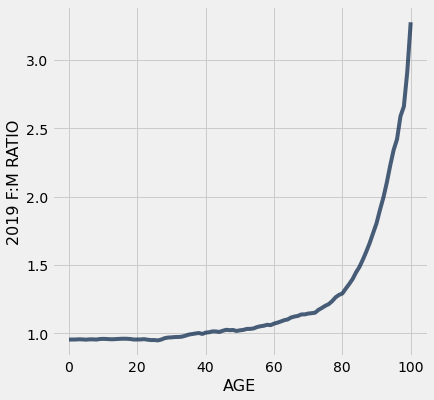

In [18]:
ratios.plot('AGE')